# Breast cancer

U ovoj bilježnici promotrit ću i primijeniti pčelinje algortime za odabir podskupa značajki na skupu podataka koji je vezan za pacijente sa rakom dojke u Wisconsinu. Skup podataka se može skinuti na [1]

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

Skup podataka ima 32 značajke od kojih prva opisuje ID kojeg nećemo promatrat, a druga opisuje odgovarajuću klasu kojoj pacijent pripada, a promatrano je stanje ukupno 569 pacijenta. Pacijent može pripadati klasi pacijenata sa malignim te sa benignim tumorom dojke. Dodatni detalji o značajkama se mogu pronaći također na [1], sve varijable su kontinuirane.

In [2]:
# Importing the dataset
dataset = pd.read_csv('wdbc.data', header=None, delimiter=',')
X = dataset.iloc[:, 2:32].values
y = dataset.iloc[:, 1].values

In [3]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Nema *missing values*, nema "čudnih" tipova podataka. Potrebno je prebaciti oznake klasa 'M' i 'B' u brojevne vrijednosti.

In [4]:
#print number of missing values
np.isnan(X).sum()

0

In [5]:
#types of elements in column in dataframe
dataset.dtypes

0       int64
1      object
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
dtype: object

In [6]:
# Encoding Y data
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

Promotrimo sad je li skup podataka balansiran, tj. imamo li podjednak broj pacijenata u svakoj klasi.

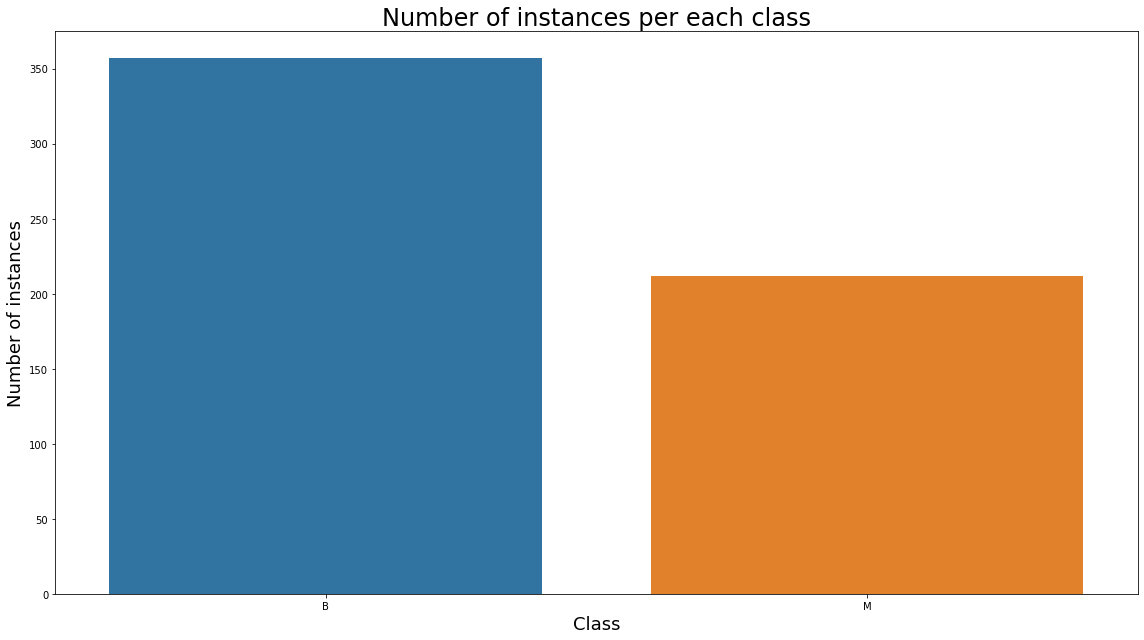

In [7]:
#Is dataset balanced?
array_num_instances = dataset[1].value_counts()

#Bar plot
plt.subplots(figsize=(16, 9))

sns.barplot(x=array_num_instances.index, y=array_num_instances)

plt.title('Number of instances per each class', fontsize=24)
plt.xlabel('Class', fontsize=18)
plt.ylabel('Number of instances', fontsize=18)

plt.tight_layout()

Iz gornjeg grafa je očito da skup nije balansiran. Ima puno više pacijenata sa benignim nego sa malignim tumorom. U ovom slučaju radi se o binarnoj klasifikaciji jer imamo dvije klase. <br>
Razlog zašto uopće promatramo je li skup balansiran će biti pojašnjen kasnije.

Sada ćemo proanalizirati postoje li neki podaci u skupu koji jako odskaču od ostalih (eng. *outliers*). U tu svrhu koristimo metodu *percentile*. Podatke podijelimo u gornji i donji kvartil te pomoću tog računamo donju i gornju granicu. Svi podaci koji se nađu ispod/iznad te granice su kandidati za *outliere*.

In [8]:
from numpy import percentile
# calculate interquartile range
for i in range(X.shape[1]):
    q25, q75 = percentile(X[:,i], 25), percentile(X[:,i], 75)
    iqr = q75 - q25
    print(str(i)+': Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = [x for x in X[:,i] if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    print(outliers)

0: Percentiles: 25th=11.700, 75th=15.780, IQR=4.080
Identified outliers: 14
[25.22, 22.27, 24.25, 23.27, 27.22, 23.29, 28.11, 23.21, 23.51, 25.73, 22.01, 27.42, 23.09, 24.63]
1: Percentiles: 25th=16.170, 75th=21.800, IQR=5.630
Identified outliers: 7
[32.47, 33.81, 39.28, 33.56, 31.12, 30.72, 30.62]
2: Percentiles: 25th=75.170, 75th=104.100, IQR=28.930
Identified outliers: 13
[171.5, 152.8, 166.2, 152.1, 182.1, 158.9, 188.5, 153.5, 155.1, 174.2, 186.9, 152.1, 165.5]
3: Percentiles: 25th=420.300, 75th=782.700, IQR=362.400
Identified outliers: 25
[1404.0, 1878.0, 1509.0, 1761.0, 1686.0, 2250.0, 1685.0, 2499.0, 1670.0, 1364.0, 1419.0, 1491.0, 1747.0, 2010.0, 1546.0, 1482.0, 1386.0, 1335.0, 1407.0, 1384.0, 2501.0, 1682.0, 1841.0, 1347.0, 1479.0]
4: Percentiles: 25th=0.086, 75th=0.105, IQR=0.019
Identified outliers: 6
[0.1425, 0.1398, 0.1447, 0.1634, 0.1371, 0.052629999999999996]
5: Percentiles: 25th=0.065, 75th=0.130, IQR=0.065
Identified outliers: 16
[0.2776, 0.2839, 0.2396, 0.2458, 0.2293

Kod velikog broja varijabli zabilježeni su podaci koji odskaču od granica u gornjem i donjem kvartilu. Zbog velikog broja varijabli ne možemo sve prikazati na jednom *pairplotu*, no možemo na njih više. Iz "šume" gornjih podataka ne možemo dobiti neki uvid, pa je poželjno iscrtat grafove. Graf *pairplot* je iz biblioteke *seaborn* i on grafički prikazuje podatke u dvije dimenzije svh mogućih parova danih atributa.

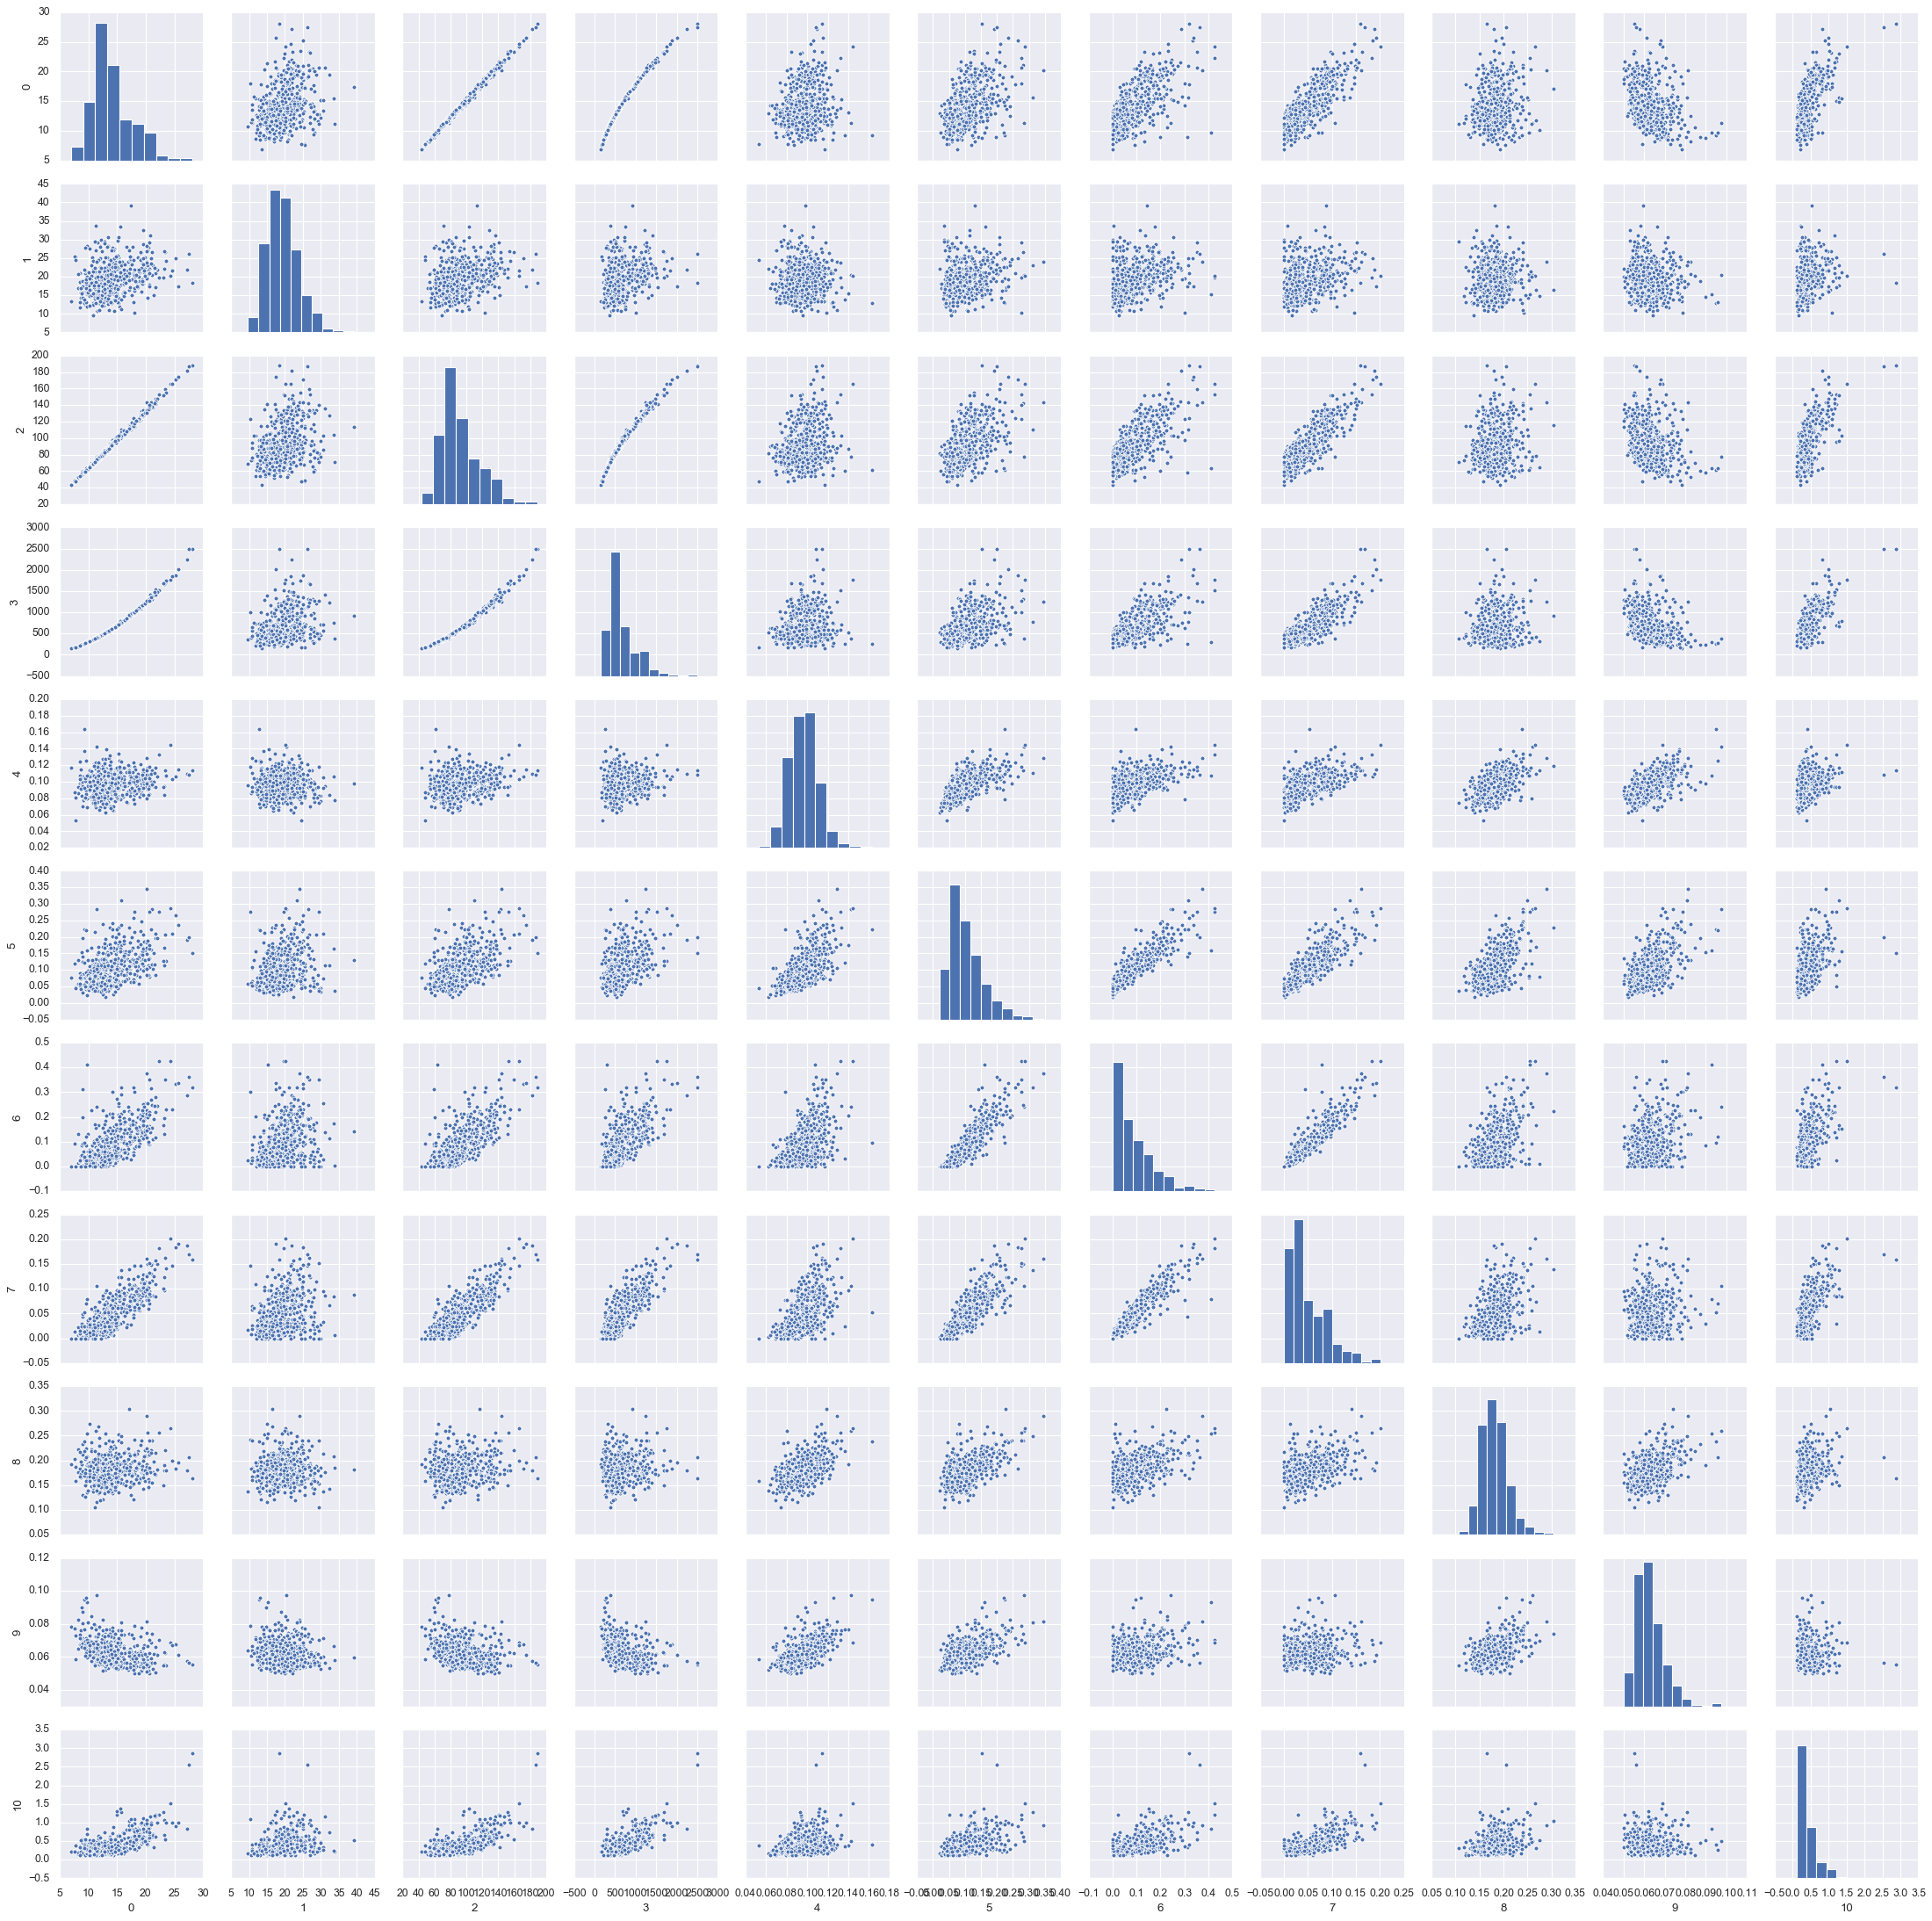

In [9]:
plt.style.use('classic')
X_df = pd.DataFrame(X)
#scatterplot
sns.set()
cols = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.pairplot(X_df[cols], height = 2.5)
plt.show();

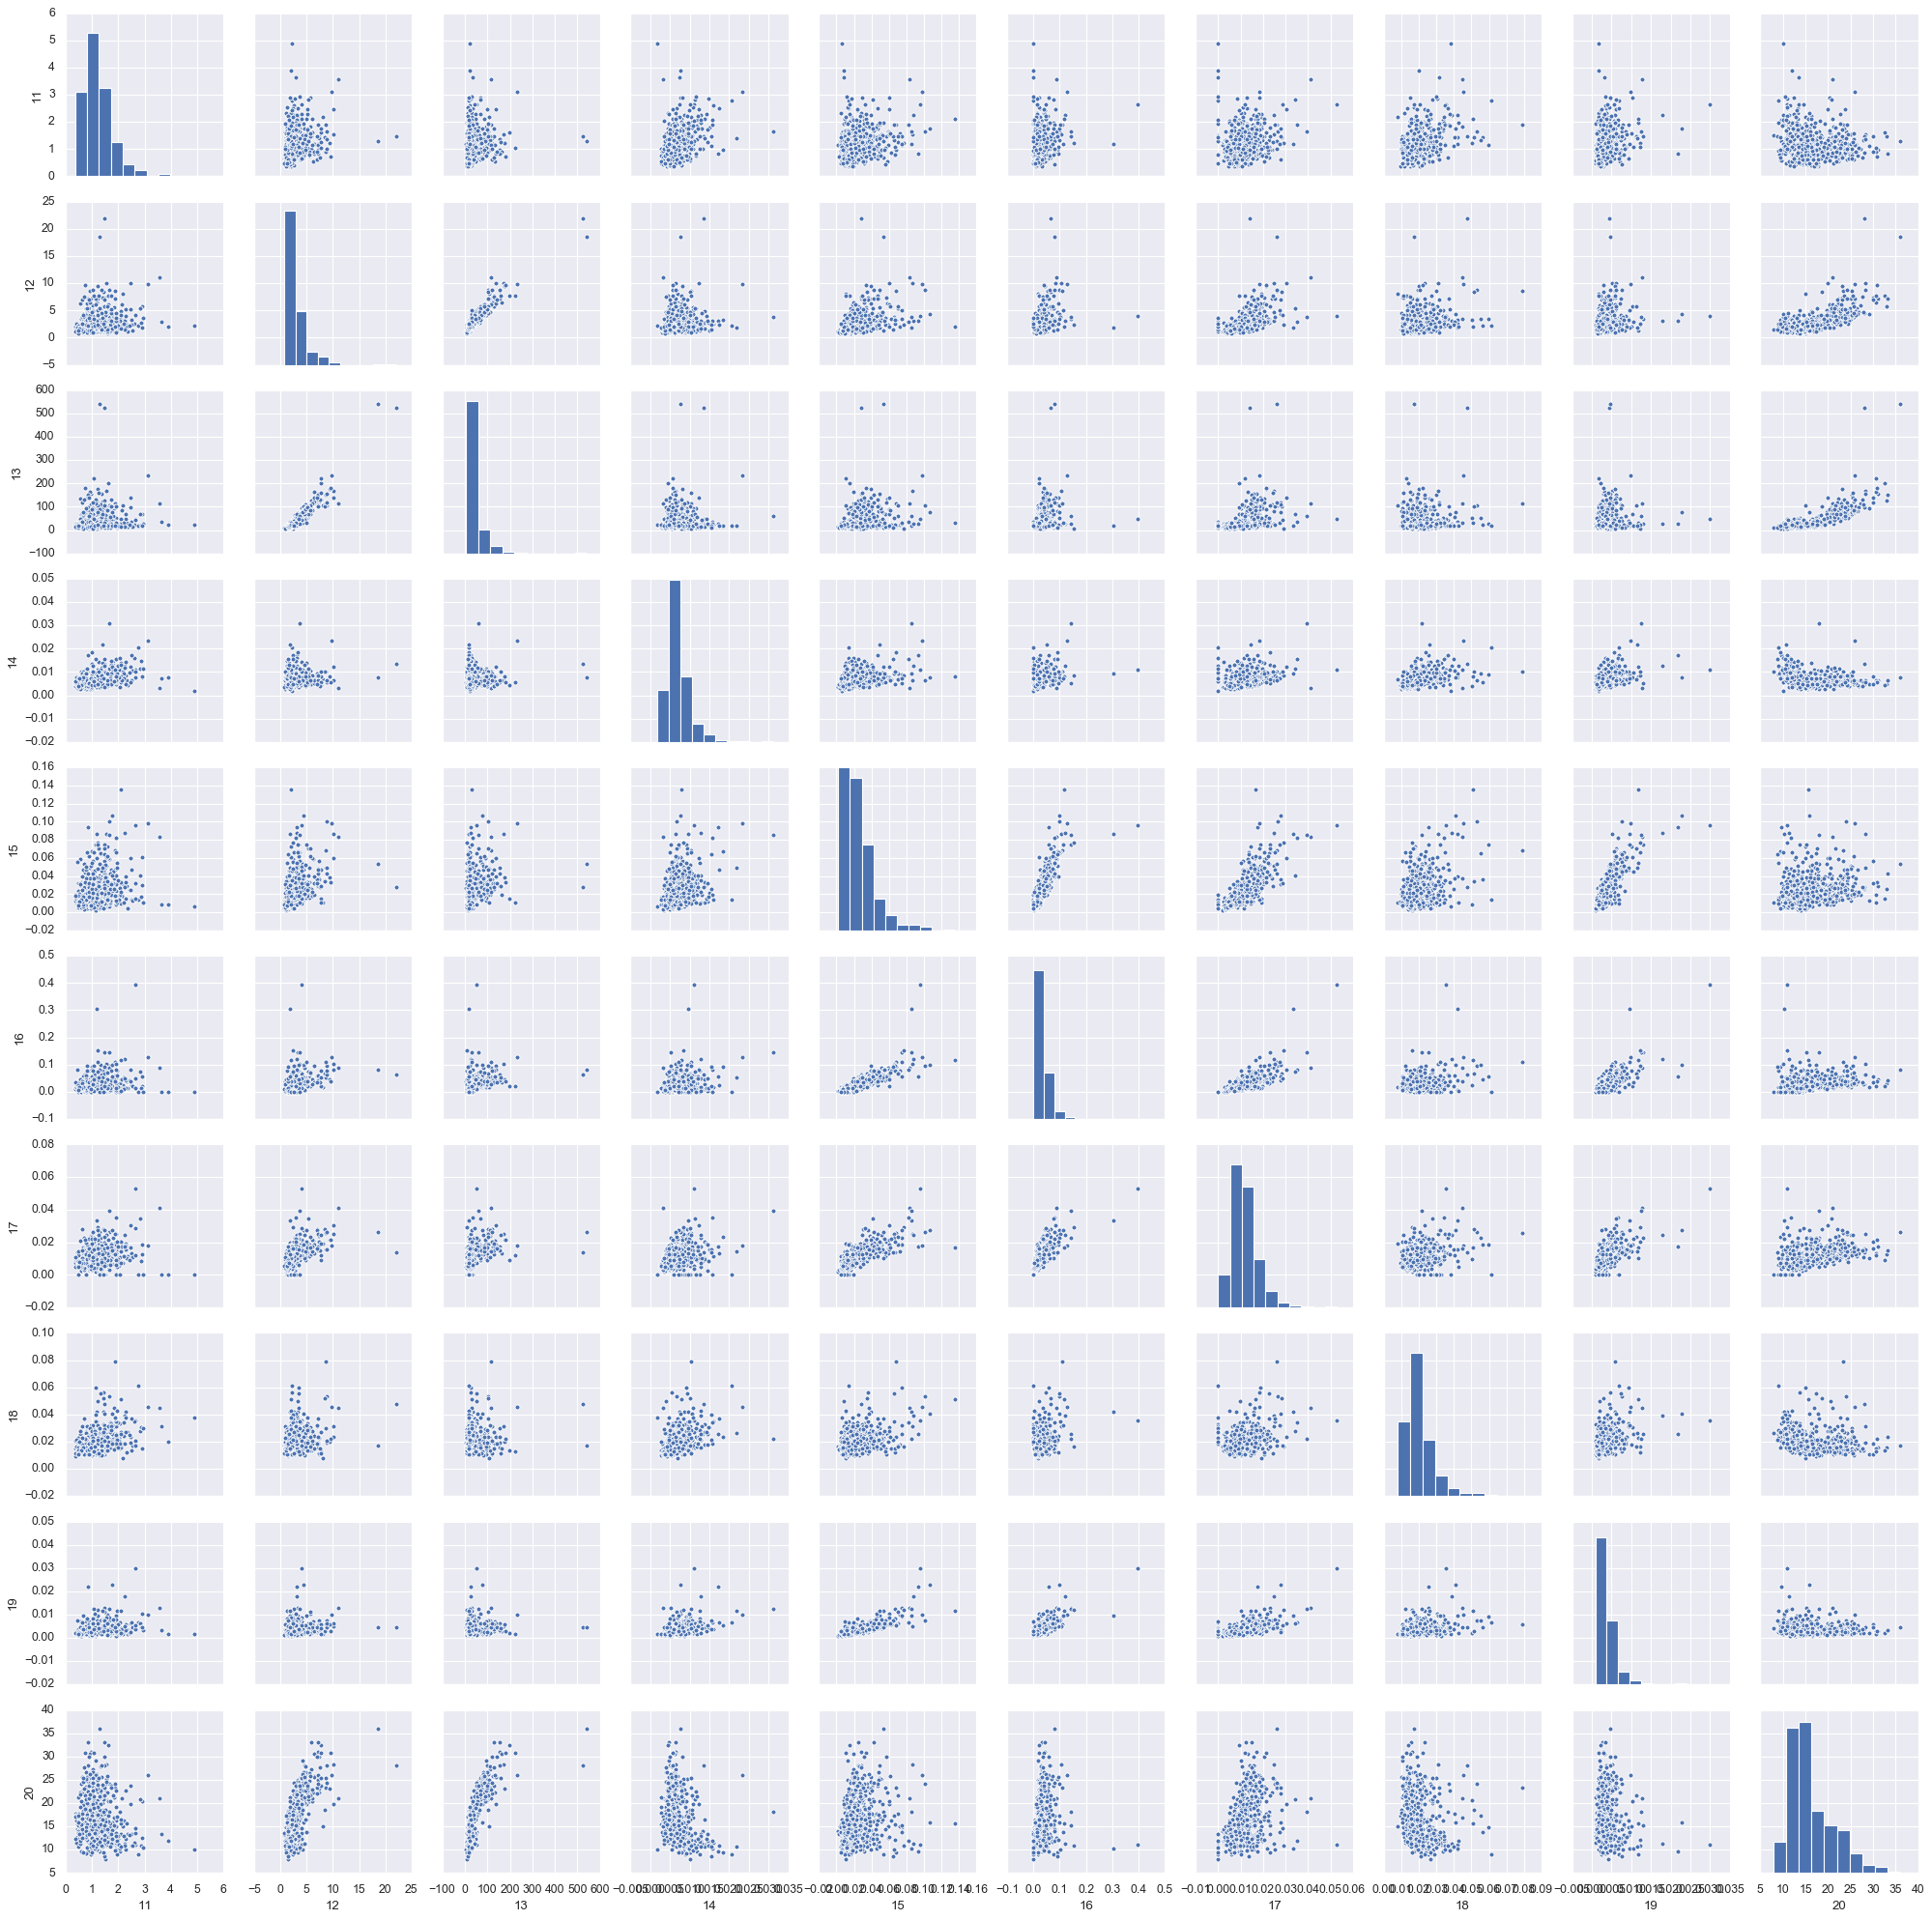

In [10]:
plt.style.use('classic')
X_df = pd.DataFrame(X)
#scatterplot
sns.set()
cols = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
sns.pairplot(X_df[cols], height = 2.5)
plt.show();

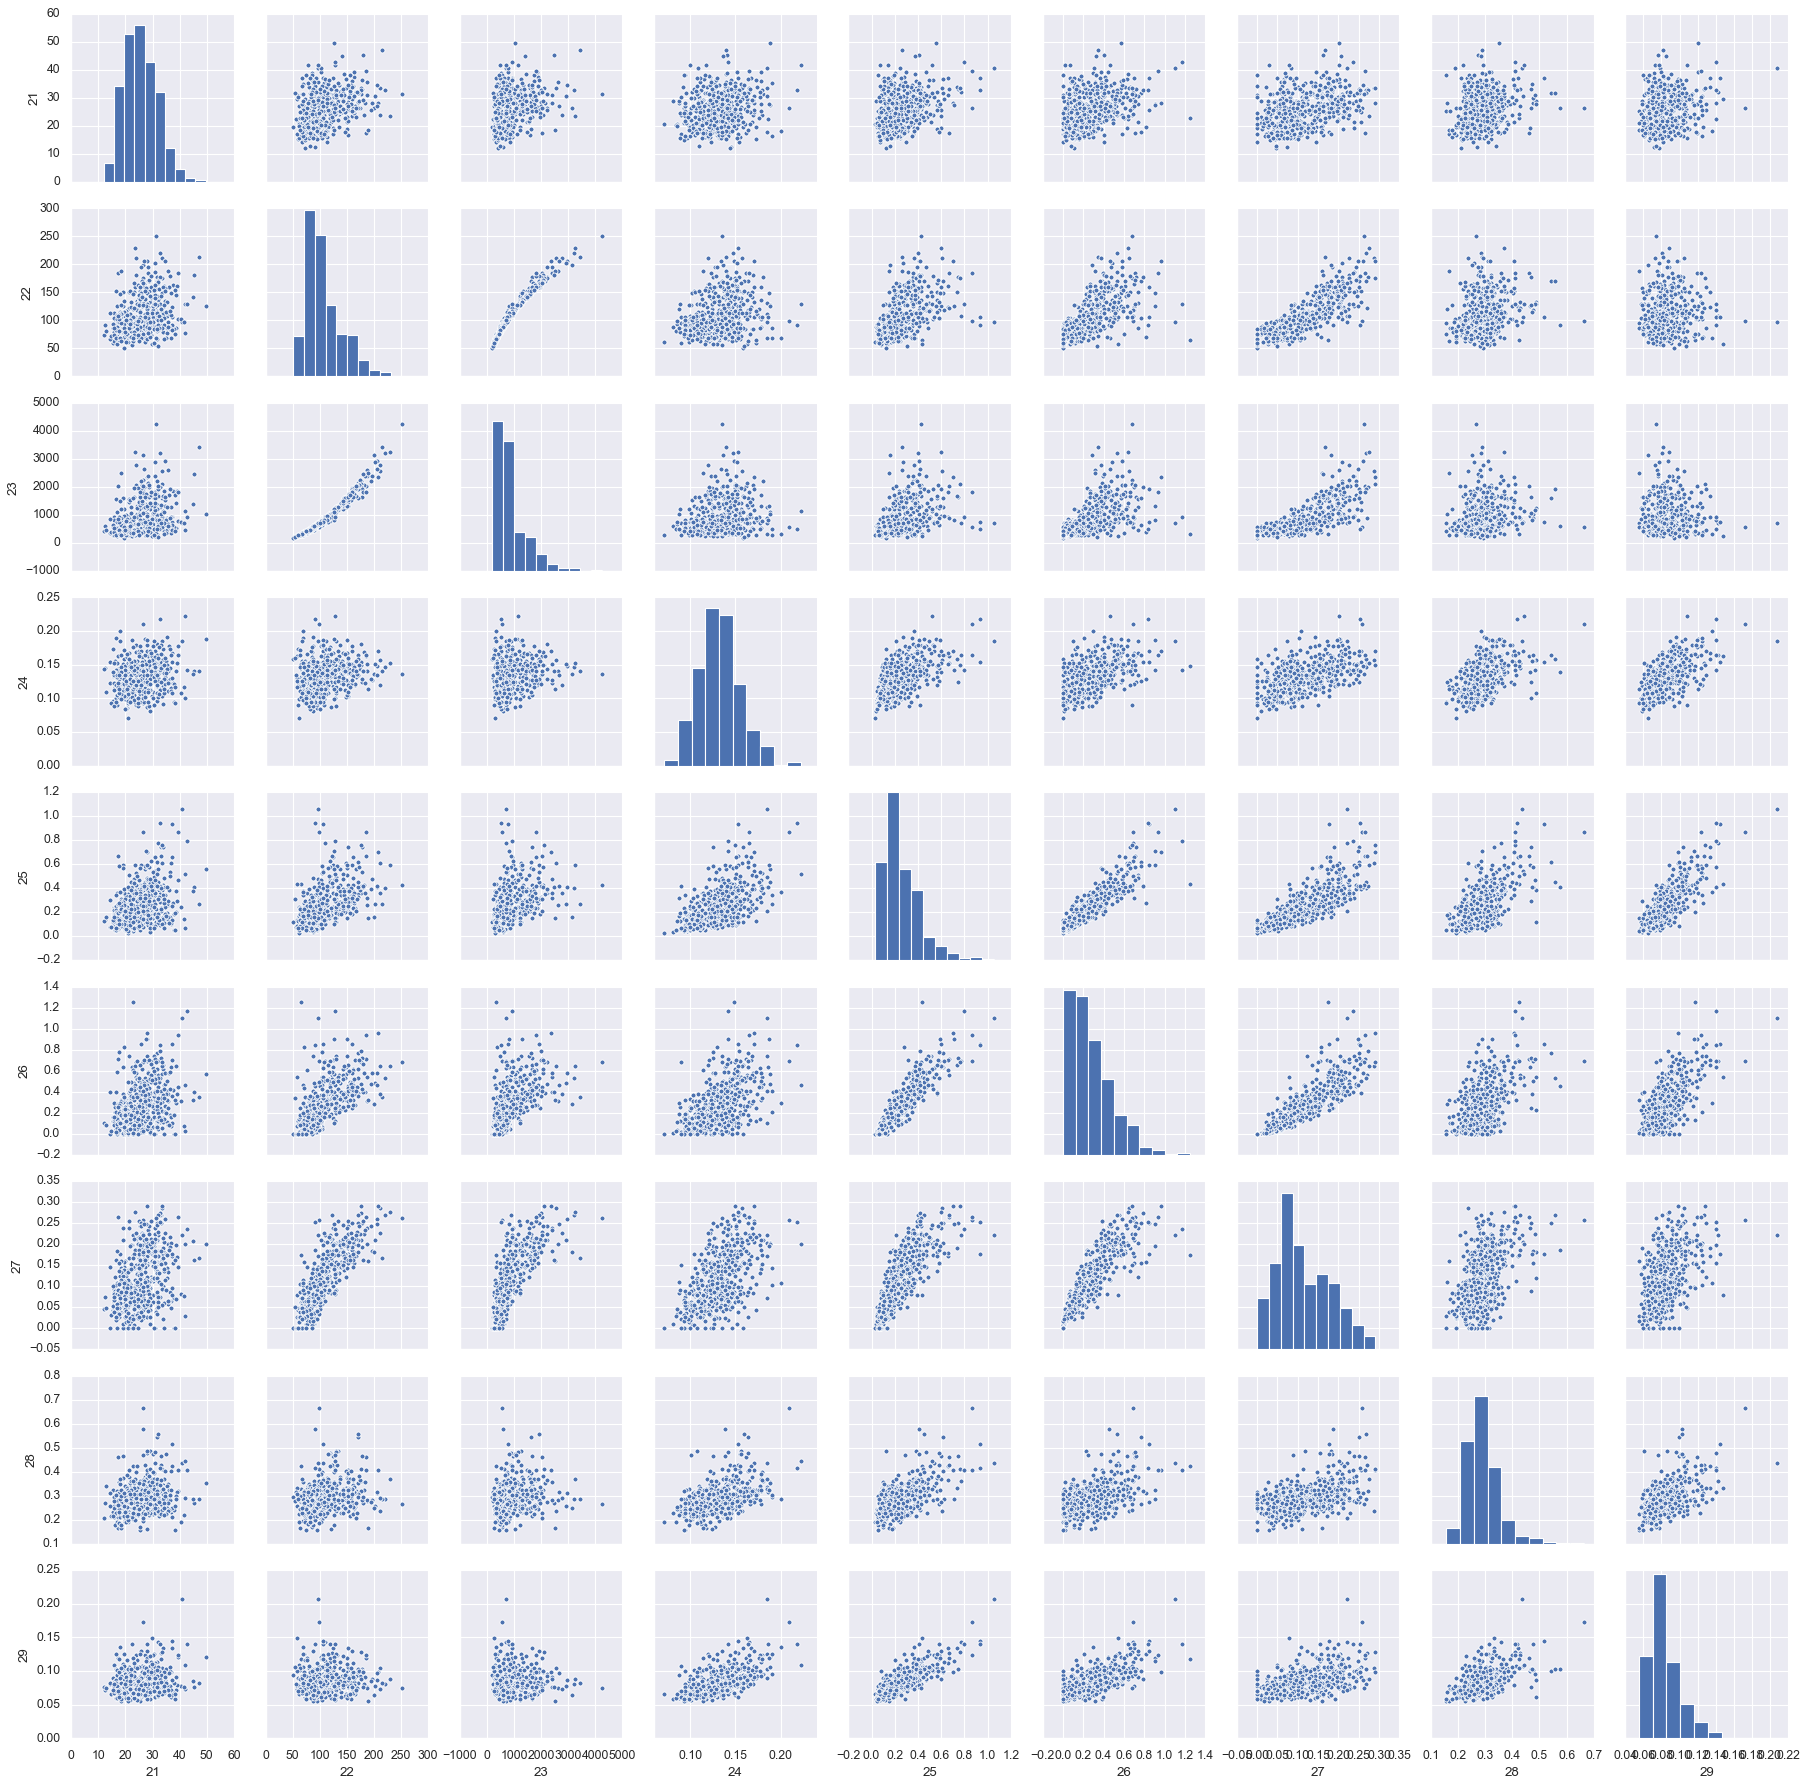

In [11]:
plt.style.use('classic')
X_df = pd.DataFrame(X)
#scatterplot
sns.set()
cols = [21, 22, 23, 24, 25, 26, 27, 28, 29]
sns.pairplot(X_df[cols], height = 2.5)
plt.show();

Nakon što pažljivo promotrimo gornje *pair plotove*, vidimo da su sumnjiva dva najveća podatka u desetoj varijabli, dva najveća podataka u trinaestoj varijabli, dva najveća u šesnaestoj varijabli, dva najveća u devetnaestoj varijabli. Bilo bi vrlo zanimljivo da se ispostavi da se radi o jednom paru podataka koji odskače na grafovima spomenutih varijabli. To ćemo provjeriti u sljedećim linijama koda. Također, sumnjiva je dvadeset i deveta varijabla.

In [12]:
np.where(X[:,10] == 2.873)

(array([212], dtype=int32),)

In [13]:
np.where(X[:,10] == 2.5469999999999997)

(array([461], dtype=int32),)

In [14]:
np.where(X[:,13] == 525.6)

(array([212], dtype=int32),)

In [15]:
np.where(X[:,13] == 542.2)

(array([461], dtype=int32),)

In [16]:
np.where(X[:,16] == 0.1435)

(array([112], dtype=int32),)

In [17]:
np.where(X[:,16] == 0.1438)

(array([213], dtype=int32),)

In [18]:
np.where(X[:,29] == 0.2075)

(array([9], dtype=int32),)

In [19]:
np.where(X[:,19] == 0.02984)

(array([152], dtype=int32),)

In [20]:
np.where(X[:,19] == 0.02286)

(array([290], dtype=int32),)

Zaista, dva podatka koji odskaču na grafovima desete i trinaeste varijable je zapravo jedan te isti par podataka i njih moramo uzeti u obzir i smatrati ih ozbiljnim kandidatima za *outliere*. Ako rezultat ne bude jako dobar, probat ćemo izbaciti ovaj par podataka i ponovo istrenirati model klasifikacije. Zasad je cilj bio izdvojiti i uzeti u obzir najkritičnije podatke. <br>
U nastavku normaliziramo podatke jer koristimo model strojnog učenja koji u obzir uzima duljine između podataka i zato je bitno provesti taj postupak.

In [21]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

Budući da je glavni problem koji se promatra u ovom radu, odabir podskupa značajki tj. odabir bitnih značajki pomoću kojih možemo istrenirati dobar klasifikacijski model, malo ćemo pomnije promotriti vezu između nezavisnih značajki i zavisne tj. cilje varijable koja govori kojoj klasi koji pacijent pripada. <br>
Najčešće se takve veze prikazuju grafom zvanim *heatmap*, također iz biblioteke *seaborn*. Jačina boje sugerira, jačinu veze između značajki. Ako promatramo dvije kontinuirane varijable, onda je najbolje računati njihovu korelaciju. Ako promatramo kategoričke varijable, onda više nema smisla gledati korelaciju jer u tom slučaju nije definirana. Tada promatramo tzv. Kramerov V koeficijent asocijacije. Ako pak promatramo jednu kategoričku i jednu kontinuiranu varijablu, onda računamo njihov *correlation ratio*. Više informacija je na [3]

Kako su sve varijable kontinuirane, računat ćemo samo *correlation ratio*.

In [22]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [23]:
dict_continious = {}
for i in range(30):
    dict_continious[i] = correlation_ratio(y, X[:,i])
mat = pd.DataFrame.from_dict(dict_continious, orient='index')

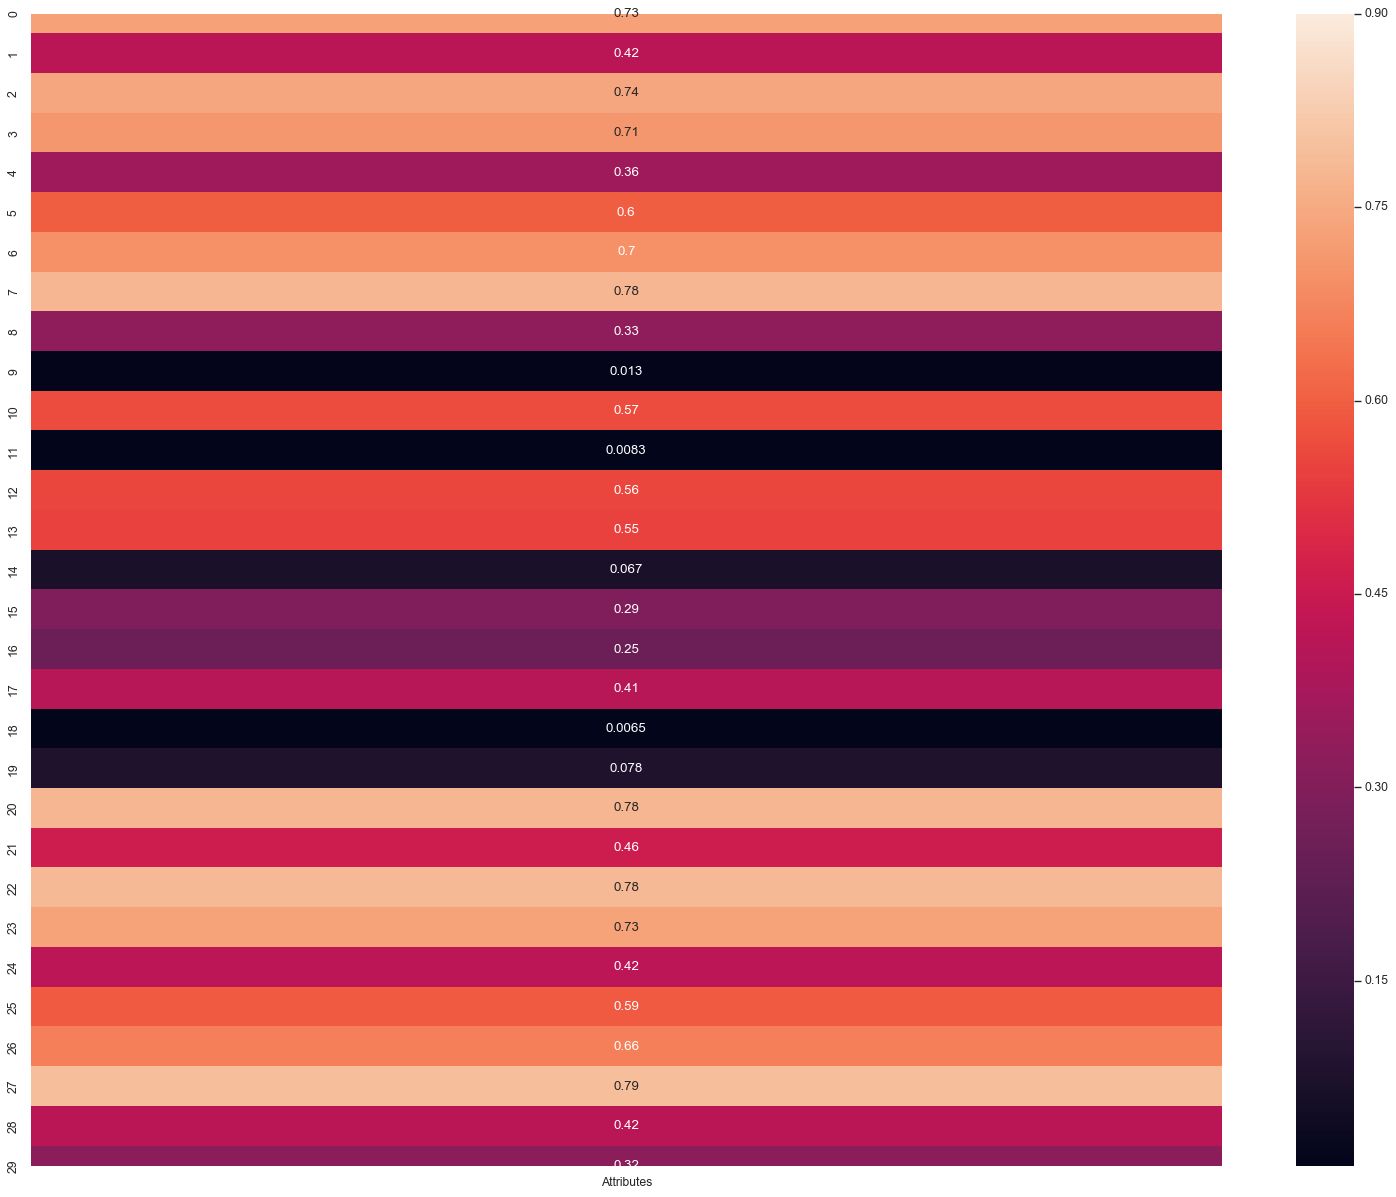

In [24]:
f, ax = plt.subplots(figsize=(24, 18))
sns.heatmap(mat, vmax=0.9, annot=True, square=False, yticklabels=mat.index.values, xticklabels=['Attributes']);

Iz grafa, može se izdvojiti devet značajki koje su jako povezane i četiri koje su tamno plave boje tj. koje su slabo povezane sa ciljnom varijablom. Po tome bi mogli očekivati da bi naš pčelinji algoritam mogao izbaciti te četiri značajke.

Prije samog algoritma, razdvojimo podatke na one trening i na one testne.

In [25]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

### BABC 

U babc.py su implementirane sve potrebne funckije za algoritam i u bilježnici BABC se nalazi pojašnjenje za svaku funkciju.

In [26]:
import babc

Inicijalizacija potrebnih argumenata za funckije iz babc.py te vrijednosti najboljeg rezultata BEST i pripadnog podskupa značajki prikazanog kao niz nula i jedinica BEST_BEE. Ta varijabla je nazvana BEST_BEE jer je upravo ta pčela tj. to rješenje optimalno u kontekstu pčelinjeg algoritma.

In [27]:
columns_number = X.shape[1]
number_employed_bees = 5
number_onlooker_bees = 5
max_iterations_number = 50
limit = 10
BEST = 0
BEST_BEE = np.zeros(columns_number)

Ranije smo spomenuli balansiranost skupa. Ako skup nije balansiran i ako za mjeru evaluacije klasifikacijskog modela koristimo *accuracy*, može se dogoditi *accuracy paradox* tj. da dobijemo lažnu jako visoku točnost modela jer velik broj podataka pripada jednoj klasi. Više o tome na [4] Postoji dosta načina kako se nositi sa tim problemom, no za naše potrebe koristit ćemo jedan od najjednostavnijih. Koristit ćemo drukčiju evaluacijsku metriku i to jednu od najjednistavnijih koja se dobro nosi sa nebalansiranim podacima, a to je *balanced accuracy*. Više o tom piše u bilježnici BABC.

Na empirijski način, nakon više pokretanja algortima, utvrdila sam da postoji vrijednost rezultata koja se najčešće izbaci kao konačan rezultat i dovoljno je oko tri pokretanja da dobijemo upravo taj rezultat. Zato donju petlju vrtimo tri puta.

Prvo kao klasifikacijski model isprobavamo *K nearest neighbors* i također na empirijski način je utvrđeno da su najbolji rezultati dosad postignuti ako se promatra 5 najbližih susjeda, zato kao argument šaljemo broj 5.

In [28]:
for i in range(3):
    employed_matrix = np.zeros((number_employed_bees,columns_number))
    limit_array = np.zeros(number_employed_bees)
    accuracies = np.zeros(number_employed_bees)
    best = 0
    best_bee = np.zeros(columns_number)
    
    babc.init(number_employed_bees, columns_number, employed_matrix)
    
    babc.init_accuracies_and_best(number_employed_bees, accuracies, X_train, X_test, y_train, y_test, 'KNN', 5, best, best_bee, 
                             employed_matrix, columns_number)
    
    RESULT = babc.iterations(max_iterations_number, limit_array, limit, employed_matrix, number_employed_bees, columns_number, 'KNN', 5, 
                accuracies, number_onlooker_bees, X_train, X_test, y_train, y_test, best, best_bee)
    if (RESULT[0] > BEST):
        BEST = RESULT[0]
        BEST_BEE = RESULT[1]
        
    print(BEST)
    print(BEST_BEE)

1.0
[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0]
1.0
[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0]
1.0
[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0]


Ispišimo i *confusion matrix* najbolje dobivenog rezultata.

In [29]:
from sklearn.metrics import confusion_matrix
#best_bee = np.array([1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0])
k=0
for j in range(0,len(BEST_BEE)):
    if BEST_BEE[j]==1:
        k+=1
X_train_features = np.zeros((X_train.shape[0], k))
X_test_features = np.zeros((X_test.shape[0], k))
        
k=0
for j in range(0,len(BEST_BEE)):
    if BEST_BEE[j]==1:
        X_train_features[:,k]=X_train[:,j]
        X_test_features[:,k]=X_test[:,j]
        k+=1
        
confusion_matrix(y_test, babc.KNN_Classifier(X_train_features, X_test_features, y_train, y_test, 5))

array([[50,  0],
       [ 0, 36]], dtype=int64)

Rezultati su odlični jer dobijemo stopostotnu točnost klasifikacije. U ovom slučaju je i *balanced accuracy* i *accuracy* jednak 1.

Dalje nećemo pokušavat neke druge klasifikacijske algoritme niti pokretat pčelinji algoritam nakon izbacivanja *outliera* jer već sad imamo maksimalni rezultat.

Kako bi usporedili "naš" pčelinji algoritam za feature selection, provjerit ćemo kakav rezultat dobijemo kad koristimo neke druge metode za odabir značajki i za dimensionality reduction. U nastavku slijedi jedna također wrapper metoda rekurzivna eliminacija značajki. Promotrit ćemo onoliko rezultata koliko ima nezavisnih varijabli. Krećemo od rezultata kad se klasificira uz pomoć samo jedne, po Recursive feature elimination kriterijima, najvažnije značajke, zatim rezultat koji se dobije ako koristimo dvije najvažnije značajke i tako dalje. Zadnji je rezultat kad koristimo sve nezavisne varijable.

In [30]:
from sklearn.metrics import balanced_accuracy_score
def RFE_fs(X_train, X_test, columns_number,  y_train, y_test):
    from sklearn.feature_selection import RFE
    from sklearn.ensemble import RandomForestClassifier
    for i in range(1,columns_number+1):
        X_train_temp = np.copy(X_train)
        X_test_temp = np.copy(X_test)
        classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)
        rfe = RFE(classifier, n_features_to_select=i, step=1)
        rfe.fit(X_train_temp, y_train)
        
        y_pred = rfe.predict(X_test_temp)
        
        
        print(balanced_accuracy_score(y_test, y_pred))

Budući da RFE iz sklearn.feature_selection radi samo sa modelima koji imaju ugrađene metode koje značajkama pridaju težine s obzirom na važnost, tu metodu možemo koristiti samo u kombinaciji sa slučajnim šumama. Također, povećana je broj stabala na 100, ali može se vidjeti da bez obzira na veći broj estimatora, rezultati nisu bolji od rezultata koji se dobiju pomoću pčelinjeg algoritma.

In [31]:
RFE_fs(X_train, X_test, columns_number,  y_train, y_test)

0.8627777777777779
0.9622222222222222
0.9622222222222222
0.9522222222222222
0.9522222222222222
0.9422222222222222
0.9622222222222222
0.9622222222222222
0.9622222222222222
0.9622222222222222
0.9622222222222222
0.9522222222222222
0.9622222222222222
0.9761111111111112
0.9522222222222222
0.9622222222222222
0.9761111111111112
0.9761111111111112
0.9761111111111112
0.9622222222222222
0.9622222222222222
0.9622222222222222
0.9522222222222222
0.9661111111111111
0.9522222222222222
0.9761111111111112
0.9761111111111112
0.9522222222222222
0.9622222222222222
0.9761111111111112


Provjerimo kakve rezultate daje korištenje *Principal component analysis* metode za *dimensionality reduction*.

In [32]:
from sklearn.metrics import balanced_accuracy_score
def principal_component_analysis(X_train, X_test, columns_number, y_train, y_test, algorithm, n):
    for i in range(1,columns_number+1):

        X_train_temp = np.copy(X_train)
        X_test_temp = np.copy(X_test)  

        # Applying PCA
        from sklearn.decomposition import PCA
        pca = PCA(n_components = i)
        X_train_temp = pca.fit_transform(X_train_temp)
        X_test_temp = pca.transform(X_test_temp)
        explained_variance = pca.explained_variance_ratio_
        if(algorithm == 'KNN'):
            score = balanced_accuracy_score(y_test, babc.KNN_Classifier(X_train_temp, X_test_temp, y_train, y_test, n))
        elif(algorithm == 'RF'):
            score = balanced_accuracy_score(y_test, babc.RF_Classifier(X_train_temp, X_test_temp, y_train, y_test, n))
        elif(algorithm == 'NB'):
            score = balanced_accuracy_score(y_test, babc.NB_Classifier(X_train_temp, X_test_temp, y_train, y_test))
        else:
            raise ValueError('Key word is not recognized.')
        
        print(score)

    print('Explained variance: ')
    print(explained_variance)

In [33]:
principal_component_analysis(X_train, X_test, columns_number, y_train, y_test, 'KNN', 5)

0.9222222222222223
0.9361111111111111
0.9422222222222222
0.9622222222222222
0.9722222222222222
0.9522222222222222
0.9622222222222222
0.9622222222222222
0.9722222222222222
0.9722222222222222
0.9861111111111112
0.9761111111111112
0.9722222222222222
0.9722222222222222
0.9722222222222222
0.9722222222222222
0.9722222222222222
0.9722222222222222
0.9722222222222222
0.9722222222222222
0.9722222222222222
0.9722222222222222
0.9722222222222222
0.9722222222222222
0.9722222222222222
0.9722222222222222
0.9722222222222222
0.9722222222222222
0.9722222222222222
0.9722222222222222
Explained variance: 
[4.32532323e-01 1.97569196e-01 9.50057566e-02 6.48167484e-02
 5.65024769e-02 4.06351056e-02 2.26545574e-02 1.59096179e-02
 1.40378064e-02 1.19164674e-02 9.77719782e-03 8.87299343e-03
 7.70035711e-03 5.19443013e-03 3.12162040e-03 2.74472079e-03
 2.13394292e-03 1.82059971e-03 1.60803473e-03 1.01623876e-03
 9.99254735e-04 9.60685959e-04 7.73837091e-04 5.75029938e-04
 5.50679372e-04 2.69774871e-04 2.22125226e-

In [34]:
principal_component_analysis(X_train, X_test, columns_number, y_train, y_test, 'RF', 100)

0.9283333333333332
0.9322222222222223
0.9183333333333333
0.9322222222222223
0.9422222222222222
0.9422222222222222
0.9283333333333332
0.9283333333333332
0.9383333333333332
0.9283333333333332
0.9383333333333332
0.9422222222222222
0.9183333333333333
0.9283333333333332
0.9183333333333333
0.9422222222222222
0.9422222222222222
0.9283333333333332
0.9183333333333333
0.9183333333333333
0.9283333333333332
0.9283333333333332
0.9283333333333332
0.9183333333333333
0.9283333333333332
0.9283333333333332
0.9283333333333332
0.9183333333333333
0.9283333333333332
0.9183333333333333
Explained variance: 
[4.32532323e-01 1.97569196e-01 9.50057566e-02 6.48167484e-02
 5.65024769e-02 4.06351056e-02 2.26545574e-02 1.59096179e-02
 1.40378064e-02 1.19164674e-02 9.77719782e-03 8.87299343e-03
 7.70035711e-03 5.19443013e-03 3.12162040e-03 2.74472079e-03
 2.13394292e-03 1.82059971e-03 1.60803473e-03 1.01623876e-03
 9.99254735e-04 9.60685959e-04 7.73837091e-04 5.75029938e-04
 5.50679372e-04 2.69774871e-04 2.22125226e-

Po dobivenim rezultatima, možemo zaključiti da pčelinji algoritam pronađe značajke s kojima se postiže bolja točnost klasifikacije nego što se postiže s PCA algoritmom.

# Literatura
​
[1] [Breast cancer dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) <br>
​
[2] [B. Subanya, R. R. Rajalaxmi, A Novel Feature Selection Algorithm for Heart Disease
Classification, International Journal of Computational Intelligence and Informatics,
Vol. 4, No. 2, 2014.](https://www.periyaruniversity.ac.in/ijcii/issue/Vol4No2September2014/IJCII-4-2-144.pdf) <br>
​
[3] [The Search for Categorical Correlation](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9) <br>
​
[4] [8 Tactics to Combat Imbalanced Classes in Your Machine Learning Dataset](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/)